In [4]:
from google.colab import drive
from torch.backends.mkl import verbose

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/CreditPrediction')

ValueError: Mountpoint must be in a directory that exists

In [8]:
!wget https://github.com/Userfrom1995/CreditCard_Predictions/raw/main/Dev_data_to_be_shared%203.zip

--2025-01-11 12:07:35--  https://github.com/Userfrom1995/CreditCard_Predictions/raw/main/Dev_data_to_be_shared%203.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Userfrom1995/CreditCard_Predictions/main/Dev_data_to_be_shared%203.zip [following]
--2025-01-11 12:07:35--  https://raw.githubusercontent.com/Userfrom1995/CreditCard_Predictions/main/Dev_data_to_be_shared%203.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51165748 (49M) [application/zip]
Saving to: ‘Dev_data_to_be_shared 3.zip’

Dev_data_to_be_shar 100%[===================>]  48.79M   295MB/s    in 0.2s    

2025-01-11 12:07:3

In [9]:
!wget https://github.com/Userfrom1995/CreditCard_Predictions/raw/main/validation_data_to_be_shared%203.zip

--2025-01-11 12:07:38--  https://github.com/Userfrom1995/CreditCard_Predictions/raw/main/validation_data_to_be_shared%203.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Userfrom1995/CreditCard_Predictions/main/validation_data_to_be_shared%203.zip [following]
--2025-01-11 12:07:38--  https://raw.githubusercontent.com/Userfrom1995/CreditCard_Predictions/main/validation_data_to_be_shared%203.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22086713 (21M) [application/zip]
Saving to: ‘validation_data_to_be_shared 3.zip’

validation_data_to_ 100%[===================>]  21.06M  --.-KB/s    in 

In [10]:
!unzip Dev_data_to_be_shared.zip
!unzip validation_data_to_be_shared.zip

Archive:  Dev_data_to_be_shared.zip
  inflating: Dev_data_to_be_shared.csv  
Archive:  validation_data_to_be_shared.zip
  inflating: validation_data_to_be_shared.csv  


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data_path = 'Dev_data_to_be_shared.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Explore the dataset
# print("Dataset Overview:")
# print(data.head())
# print("\nData Info:")
# print(data.info())
# print("\nMissing Values:")
# print(data.isnull().sum())
#
# # Handle missing values (if any)
# data.fillna(data.median(numeric_only=True), inplace=True)
#
# # Separate features and target variable (bad_flag)
# X = data.drop(columns=['bad_flag'])
# y = data['bad_flag']
#
# # Convert categorical variables into dummy/indicator variables (if applicable)
# X = pd.get_dummies(X, drop_first=True)
#
# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # Initialize the model
# model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
#
# # Train the model
# model.fit(X_train, y_train)
#
# # Make predictions
# y_pred = model.predict(X_test)
#
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("\nAccuracy:", accuracy)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))
#
# # Feature Importance (Optional)
# feature_importance = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': model.feature_importances_
# }).sort_values(by='Importance', ascending=False)
#
# print("\nFeature Importances:")
# print(feature_importance)
#
# # Save the trained model (Optional)
# import joblib
# joblib.dump(model, 'bad_flag_model.pkl')
#
# print("Model training and evaluation complete.")


In [5]:
import pandas as pd

# Load the CSV file
file_path = 'Dev_data_to_be_shared.csv'  # Replace with the path to your CSV file

# Read the file (change 'nrows' if the CSV is too large to process at once)
df = pd.read_csv(file_path, nrows=96806)  # Adjust 'nrows' as needed for quick preview

# Analyze columns
column_info = []
for column in df.columns:
    col_data = {
        "Column Name": column,
        "Data Type": df[column].dtype,
        "Number of Unique Values": df[column].nunique(),
        "Number of Missing Values": df[column].isnull().sum(),
        "Sample Values": df[column].dropna().unique()[:5].tolist()  # Sample up to 5 unique values
    }
    column_info.append(col_data)

# Save the column analysis to a CSV file
output_path = 'column_analysis.csv'  # Adjust as needed
analysis_df = pd.DataFrame(column_info)
analysis_df.to_csv(output_path, index=False)

print(f"Column analysis saved to {output_path}")


Column analysis saved to column_analysis.csv


In [7]:
import pandas as pd

# Load the CSV file
file_path = 'Dev_data_to_be_shared.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Filter rows where bad_flag = 1
bad_flag_df = df[df['bad_flag'] == 0]

# Analyze columns for rows with bad_flag = 1
column_info = []
for column in bad_flag_df.columns:
    col_data = {
        "Column Name": column,
        "Data Type": bad_flag_df[column].dtype,
        "Number of Unique Values": bad_flag_df[column].nunique(),
        "Number of Missing Values": bad_flag_df[column].isnull().sum(),
        "Sample Values": bad_flag_df[column].dropna().unique()[:5].tolist()  # Sample up to 5 unique values
    }
    column_info.append(col_data)

# Save the analysis to a CSV file
output_path = 'bad_flag_0_analysis.csv'  # Specify the output file path
analysis_df = pd.DataFrame(column_info)
analysis_df.to_csv(output_path, index=False)

print(f"Analysis of rows with bad_flag = 0 saved to {output_path}")


Analysis of rows with bad_flag = 1 saved to bad_flag_0_analysis.csv


In [3]:
print("Dataset Overview:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
   account_number  bad_flag  onus_attribute_1  transaction_attribute_1  \
0               1         0               NaN                      NaN   
1               2         0          221000.0                      0.0   
2               3         0           25000.0                      0.0   
3               4         0           86000.0                      0.0   
4               5         0          215000.0                      0.0   

   transaction_attribute_2  transaction_attribute_3  transaction_attribute_4  \
0                      NaN                      NaN                      NaN   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   transaction_attribute_5  transaction_attribute_6  tra

In [13]:
# Count the values of bad_flag
print("\nCount of bad_flag values:")
print(data['bad_flag'].value_counts())


Count of bad_flag values:
bad_flag
0    95434
1     1372
Name: count, dtype: int64


In [14]:
print(data.isnull().sum())


account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1216, dtype: int64


In [32]:
data.fillna(data.median(numeric_only=True), inplace=True)
data.fillna('Unknown', inplace=True)  # For categorical columns
# Separate features and target variable (bad_flag)
X = data.drop(columns=['bad_flag'])
y = data['bad_flag']

# Convert categorical variables into dummy/indicator variables (if applicable)
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [ ]:
# Initialize the model
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.98578600499969

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     47715
           1       0.00      0.00      0.00       688

    accuracy                           0.99     48403
   macro avg       0.49      0.50      0.50     48403
weighted avg       0.97      0.99      0.98     48403



C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Feature Importance (Optional)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance)

# Save the trained model (Optional)
import joblib
joblib.dump(model, 'bad_flag_model.pkl')

print("Model training and evaluation complete.")



Feature Importances:
                        Feature  Importance
1116           onus_attribute_2    0.012664
1134          onus_attribute_20    0.009366
1131          onus_attribute_17    0.009190
810                  bureau_145    0.007738
1103                 bureau_439    0.007274
...                         ...         ...
198   transaction_attribute_197    0.000000
344   transaction_attribute_343    0.000000
197   transaction_attribute_196    0.000000
240   transaction_attribute_239    0.000000
314   transaction_attribute_313    0.000000

[1213 rows x 2 columns]
Model training and evaluation complete.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Load the development dataset
data_path = 'Dev_data_to_be_shared.csv'  # Replace with your file path
data = pd.read_csv(data_path)


,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,96802,0,156000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
96802,96803,0,46000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0
96803,96804,0,95000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
96804,96805,0,88000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Explore the dataset
print("Dataset Overview:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Count the values of bad_flag
print("\nCount of bad_flag values:")
print(data['bad_flag'].value_counts())

# Handle missing values
data.fillna(data.median(numeric_only=True), inplace=True)
data.fillna('Unknown', inplace=True)  # For categorical columns

# Separate features and target variable (bad_flag)
X = data.drop(columns=['bad_flag', 'account_number'])  # Exclude account_number
y = data['bad_flag']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dataset Overview:


NameError: name 'data' is not defined

In [ ]:
# Initialize and train the model with hyperparameter tuning
model = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC AUC Score:", roc_auc)

# Load validation data
validation_path = 'validation_data_to_be_shared.csv'  # Replace with your file path
validation_data = pd.read_csv(validation_path)

# Preprocess validation data
validation_data.fillna(data.median(numeric_only=True), inplace=True)
X_validation = validation_data.drop(columns=['account_number'])
X_validation = pd.get_dummies(X_validation, drop_first=True)

# Align columns with training data
X_validation = X_validation.reindex(columns=X.columns, fill_value=0)

# Predict probabilities for validation data
validation_data['predicted_probability'] = best_model.predict_proba(X_validation)[:, 1]

# Save predictions
validation_data[['account_number', 'predicted_probability']].to_csv('validation_predictions.csv', index=False)

print("Predictions for validation data saved to 'validation_predictions.csv'.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils import parallel_backend
from tqdm import tqdm

# Load the development dataset
data_path = 'Dev_data_to_be_shared.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Explore the dataset
print("Dataset Overview:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Count the values of bad_flag
print("\nCount of bad_flag values:")
print(data['bad_flag'].value_counts())

# Handle missing values
data.fillna(data.median(numeric_only=True), inplace=True)

# Separate features and target variable (bad_flag)
X = data.drop(columns=['bad_flag', 'account_number'])  # Exclude account_number
y = data['bad_flag']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model with hyperparameter tuning





Dataset Overview:
   account_number  bad_flag  onus_attribute_1  transaction_attribute_1  \
0               1         0               NaN                      NaN   
1               2         0          221000.0                      0.0   
2               3         0           25000.0                      0.0   
3               4         0           86000.0                      0.0   
4               5         0          215000.0                      0.0   

   transaction_attribute_2  transaction_attribute_3  transaction_attribute_4  \
0                      NaN                      NaN                      NaN   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   transaction_attribute_5  transaction_attribute_6  tra

In [ ]:
model = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

def print_progress(cv_results):
    print("\nProgress Report:")
    for i in range(len(cv_results['params'])):
        print(f"Parameters: {cv_results['params'][i]} - Mean ROC AUC: {cv_results['mean_test_score'][i]:.4f}")

with parallel_backend('threading'):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, return_train_score=True)
    print("Starting Grid Search...")
    grid_search.fit(X_train, y_train)
    print_progress(grid_search.cv_results_)

# Best model from grid search
best_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

Starting Grid Search...
Fitting 5 folds for each of 8 candidates, totalling 40 fits



KeyboardInterrupt



In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC AUC Score:", roc_auc)

# Load validation data
validation_path = 'validation_data_to_be_shared.csv'  # Replace with your file path
validation_data = pd.read_csv(validation_path)

# Preprocess validation data
validation_data.fillna(data.median(numeric_only=True), inplace=True)
X_validation = validation_data.drop(columns=['account_number'])
X_validation = pd.get_dummies(X_validation, drop_first=True)

# Align columns with training data
X_validation = X_validation.reindex(columns=X.columns, fill_value=0)

# Predict probabilities for validation data
validation_data['predicted_probability'] = best_model.predict_proba(X_validation)[:, 1]

# Save predictions
validation_data[['account_number', 'predicted_probability']].to_csv('validation_predictions.csv', index=False)

print("Predictions for validation data saved to 'validation_predictions.csv'.")

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define MLP model
mlp = MLPClassifier(random_state=42, max_iter=500)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (150, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],  # Regularization term
    'learning_rate': ['constant', 'adaptive']
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_mlp = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_mlp.predict(X_test)
y_pred_proba = best_mlp.predict_proba(X_test)[:, 1]

# Evaluation
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


KeyboardInterrupt: 

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define MLP model with default hyperparameters
mlp = MLPClassifier(random_state=42, max_iter=500)

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)
y_pred_proba = mlp.predict_proba(X_test)[:, 1]

# Evaluation
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:")
print(classification_report(y_test, y_pred))


ROC AUC Score: 0.5130616509926855
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       957
           1       0.00      0.00      0.00        12

    accuracy                           0.99       969
   macro avg       0.49      0.50      0.50       969
weighted avg       0.98      0.99      0.98       969



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define MLP model
class RegularizedMLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(RegularizedMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.dropout1(self.relu1(self.bn1(self.fc1(x))))
        x = self.dropout2(self.relu2(self.bn2(self.fc2(x))))
        x = self.softmax(self.fc3(x))
        return x


# Initialize model, loss, optimizer
input_size = X_train.shape[1]
hidden_sizes = [100, 50]
output_size = 2
model = RegularizedMLP(input_size, output_size)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to('cuda')
        y_batch = y_batch.to('cuda')

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}")
    print(outputs)

# Evaluate model
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to('cuda')
    outputs = model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)

# Calculate metrics
from sklearn.metrics import classification_report, roc_auc_score
print("Classification Report:")
print(classification_report(y_test, y_pred.cpu().numpy()))


Epoch [1/10], Loss: 0.34774571657180786
tensor([[1.0000e+00, 1.3451e-07],
        [1.0000e+00, 1.2757e-07],
        [1.0000e+00, 8.7681e-08],
        [1.0000e+00, 3.7847e-07],
        [1.0000e+00, 3.1136e-07],
        [1.0000e+00, 5.2731e-07],
        [1.0000e+00, 1.8693e-06],
        [1.0000e+00, 1.0376e-07],
        [1.0000e+00, 1.9940e-09],
        [9.9999e-01, 1.1285e-05],
        [1.0000e+00, 1.5781e-06],
        [1.0000e+00, 6.3425e-07],
        [9.9999e-01, 5.2303e-06],
        [1.0000e+00, 1.0227e-06],
        [9.9999e-01, 1.0415e-05],
        [9.9998e-01, 2.0925e-05],
        [1.0000e+00, 7.1924e-07],
        [1.0000e+00, 2.8048e-06],
        [1.0000e+00, 3.6351e-07],
        [1.0000e+00, 6.7690e-09],
        [1.0000e+00, 9.3729e-08],
        [1.0000e+00, 6.1866e-07],
        [1.0000e+00, 1.3685e-06],
        [1.0000e+00, 2.8665e-07],
        [1.0000e+00, 1.2886e-07],
        [9.9999e-01, 5.7330e-06],
        [1.0000e+00, 1.4215e-06],
        [1.0000e+00, 6.3889e-08],
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
outputs

tensor([[1.0000e+00, 1.7384e-12],
        [1.0000e+00, 2.0397e-11],
        [1.0000e+00, 1.0481e-11],
        ...,
        [1.0000e+00, 5.7150e-11],
        [1.0000e+00, 6.8074e-12],
        [1.0000e+00, 5.8806e-13]], device='cuda:0')

In [59]:
y_batch

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], device='cuda:0')

In [ ]:
# Ensure both y_test and y_pred are on the same device
y_test = y_test.cpu() if y_test.is_cuda else y_test
y_pred = y_pred.cpu() if y_pred.is_cuda else y_pred

# Calculate correct and incorrect predictions
correct_predictions = (y_test == y_pred).sum().item()
incorrect_predictions = (y_test != y_pred).sum().item()

# Data for the plot
categories = ['Correct Predictions', 'Incorrect Predictions']
values = [correct_predictions, incorrect_predictions]

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['green', 'red'])
plt.title('Model Prediction Performan


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test (true labels) and y_pred (predicted labels) are available
correct_predictions = (y_test == y_pred).sum()
incorrect_predictions = (y_test != y_pred).sum()

# Data for the plot
categories = ['Correct Predictions', 'Incorrect Predictions']
values = [correct_predictions, incorrect_predictions]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['green', 'red'])
plt.title('Model Prediction Performance')
plt.ylabel('Number of Predictions')
plt.show()


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

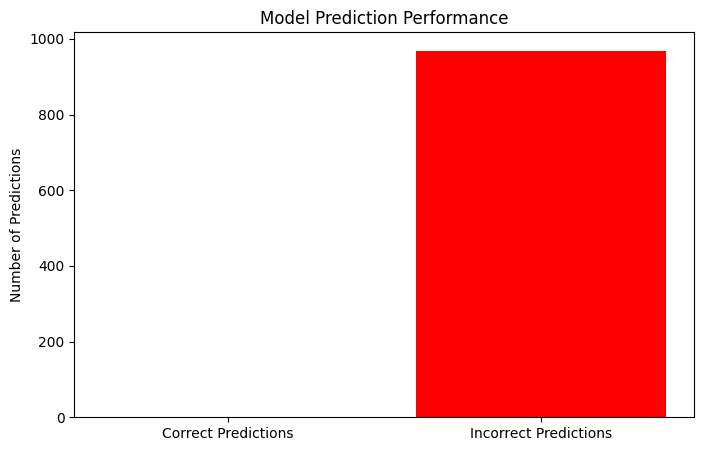

In [62]:
# Ensure both y_test and y_pred are on the same device
# X_test = torch.tensor(X_test.values, dtype=torch.float32)
# y_test = torch.tensor(y_test.values, dtype=torch.long)
# X_pred = X_pred.to('cpu')
y_pred = y_pred.to('cpu')

# Calculate correct and incorrect predictions
correct_predictions = (y_test == y_pred).sum().item()
incorrect_predictions = (y_test != y_pred).sum().item()

# Data for the plot
categories = ['Correct Predictions', 'Incorrect Predictions']
values = [correct_predictions, incorrect_predictions]

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['green', 'red'])
plt.title('Model Prediction Performance')
plt.ylabel('Number of Predictions')
plt.show()


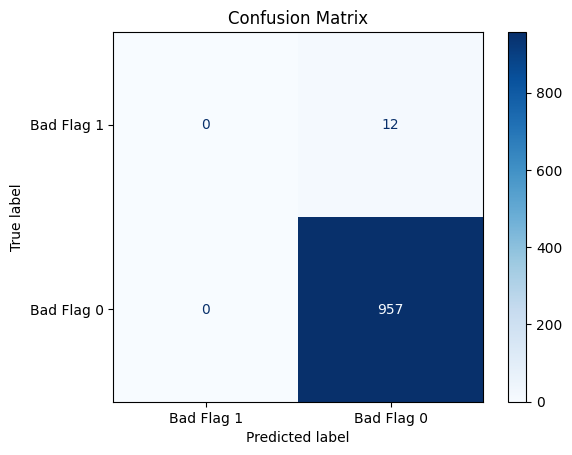

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad Flag 1', 'Bad Flag 0'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [37]:
#from sklearn.metrics import precision_recall_curve

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot precision-recall curve
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title('Precision-Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.legend()
plt.show()


NameError: name 'y_pred_proba' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file (update 'your_file.csv' with your actual file path)
file_path = 'Dev_data_to_be_shared.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
data.info()

print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Visualize the distribution of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# Visualize categorical features
categorical_features = data.select_dtypes(include=['object', 'category']).columns
for column in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Pairplot for numerical features (optional, can be heavy for large datasets)
if len(numerical_features) <= 5:  # Limit pairplot to a small number of features
    sns.pairplot(data[numerical_features])
    plt.show()

# Boxplots for numerical features grouped by a categorical feature (if available)
if len(categorical_features) > 0:
    grouping_column = categorical_features[0]  # Choose the first categorical column
    for column in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=data, x=grouping_column, y=column, palette='Set2')
        plt.title(f'Boxplot of {column} by {grouping_column}')
        plt.xlabel(grouping_column)
        plt.ylabel(column)
        plt.grid()
        plt.show()

# Summary of insights
print("\nSummary of Insights:")
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")
print(f"Numerical Features: {list(numerical_features)}")
print(f"Categorical Features: {list(categorical_features)}")
print("Missing Values:")
print(data.isnull().sum())


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the data
file_path = 'Dev_data_to_be_shared.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Replace missing values with 0
df.fillna(0, inplace=True)

# Define features (X) and target (y)
X = df.drop(['bad_flag', 'account_number'], axis=1)  # Drop target and ID columns
y = df['bad_flag']

In [3]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print(1)

# Divide target into 100 probability bins
# y_smote_prob = (y_smote * 100).astype(int)  # Scale 0/1 into 0–100 bins

# Encode target for neural network
# y_smote_encoded = to_categorical(y_smote_prob, num_classes=101)
print(2)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

1
2


In [4]:
y_train.shape

(152694,)

In [5]:




# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    
    Dense(101, activation='softmax')  # Output layer (101 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model



In [6]:
X_train_scaled.shape[1]

1214

In [7]:
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test),verbose=1)

# Evaluate the model


Epoch 1/20


ValueError: in user code:

    File "C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 101) are incompatible


In [5]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.2f}")



1193/1193 [==============================] - 2s 1ms/step - loss: 0.1334 - accuracy: 0.9900
Test Accuracy: 0.99


In [6]:
# Save the trained model
model.save('credit_default_model.h5')

In [9]:
import pandas as pd

# Load the main CSV file
file_path = 'Dev_data_to_be_shared.csv'  # Replace with your main file path
df = pd.read_csv(file_path)

# Extract entries with bad_flag = 1
bad_flag_entries = df[df['bad_flag'] == 0]

# Save these entries to a new CSV file
bad_flag_file = 'bad_flag_test_0.csv'
bad_flag_entries.to_csv(bad_flag_file, index=False)

print(f"Saved {len(bad_flag_entries)} entries with bad_flag = 1 to '{bad_flag_file}'.")


Saved 95434 entries with bad_flag = 1 to 'bad_flag_test_0.csv'.


In [11]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Load the filtered CSV file
filtered_data_path = 'bad_flag_test_0.csv'
filtered_df = pd.read_csv(filtered_data_path)

# Separate features (X) and target (y)
X_filtered = filtered_df.drop(['bad_flag', 'account_number'], axis=1)
y_filtered = filtered_df['bad_flag']

# Handle missing values by replacing with 0
X_filtered.fillna(0, inplace=True)

# Standardize the input features
scaler = StandardScaler()
X_filtered_scaled = scaler.fit_transform(X_filtered)

# Load the trained model
model = tf.keras.models.load_model('credit_default_model.h5')

# Predict probabilities
predictions = model.predict(X_filtered_scaled)

# Convert probabilities to class labels
predicted_classes = predictions.argmax(axis=1) / 100  # Scale back to probability

# Calculate accuracy
correct_predictions = sum((predicted_classes <= 0.5) == y_filtered)
accuracy = correct_predictions / len(y_filtered)

print(f"Accuracy on filtered data (bad_flag=1): {accuracy:.2%}")


2983/2983 [==============================] - 4s 1ms/step
Accuracy on filtered data (bad_flag=1): 15.43%


In [15]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'Dev_data_to_be_shared.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Separate features (X), account numbers, and target (bad_flag)
account_numbers = df['account_number']  # Assuming 'account_number' is the column name
X = df.drop(['bad_flag', 'account_number'], axis=1)
y = df['bad_flag']  # You won't use this during prediction

# Handle missing values by replacing with 0
X.fillna(0, inplace=True)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Load the trained model
model = tf.keras.models.load_model('credit_default_model.h5')

# Predict probabilities
predictions = model.predict(X_scaled)

# Decode the predicted probabilities
predicted_probabilities = predictions.argmax(axis=1) / 100  # Convert to probability scale

Combine account numbers, predicted probabilities, and actual values for comparison
output_df = pd.DataFrame({
    'account_number': account_numbers,
    'predicted_probability': predictions[:, 1],  # Assuming bad_flag=1 is the positive class
    'actual_bad_flag': y  # Adding actual values for comparison
})

# Save the predictions to a CSV file
output_file = 'predictions_with_probabilities.csv'
output_df.to_csv(output_file, index=False)

print(f"Predictions saved to '{output_file}'.")


3026/3026 [==============================] - 4s 1ms/step


3026/3026 [==============================] - 4s 1ms/step


<Figure size 800x600 with 0 Axes>

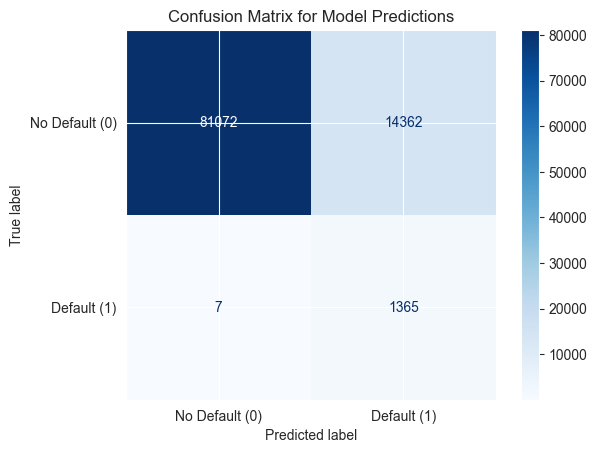

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Dev_data_to_be_shared.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Separate features (X) and target (bad_flag)
X = df.drop(['bad_flag', 'account_number'], axis=1)
y_true = df['bad_flag']  # Actual labels

# Handle missing values by replacing with 0
X.fillna(0, inplace=True)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Load the trained model
model = tf.keras.models.load_model('credit_default_model.h5')

# Predict probabilities
predictions = model.predict(X_scaled)

# Convert probabilities to binary labels (using threshold 0.5)
predicted_labels = (predictions.argmax(axis=1) / 100 >= 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_true, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default (0)', 'Default (1)'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model Predictions")
plt.show()


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import f1_score

# Load your SMOTE-enhanced dataset
# data = pd.read_csv("smote_data.csv")  # Replace with your SMOTE dataset path
# 
# # Split features and target
# X = data.drop(columns=["bad_flag"])
# y = data["bad_flag"]
# 
# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 
# # Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, random_state=42)
}

Training Logistic Regression...


C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression AUC: 0.9741
Logistic Regression F1 Score: 0.9120
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     19037
           1       0.92      0.90      0.91     19137

    accuracy                           0.91     38174
   macro avg       0.91      0.91      0.91     38174
weighted avg       0.91      0.91      0.91     38174

--------------------------------------------------
Confusion Matrix for Logistic Regression:
[[17605  1432]
 [ 1894 17243]]
--------------------------------------------------


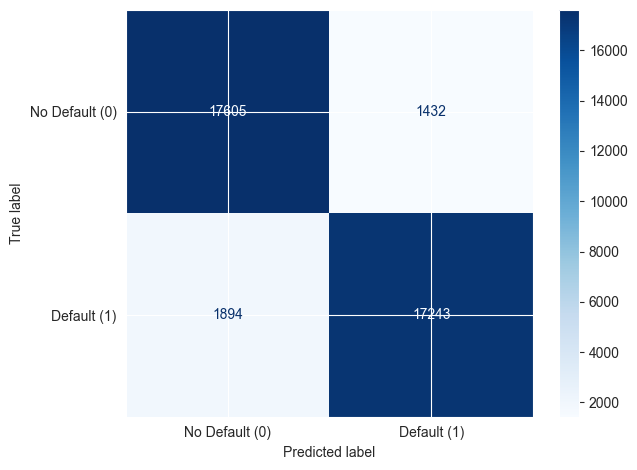

Logistic Regression model saved.

Training Decision Tree...
Decision Tree AUC: 0.9813
Decision Tree F1 Score: 0.9814
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19037
           1       0.98      0.98      0.98     19137

    accuracy                           0.98     38174
   macro avg       0.98      0.98      0.98     38174
weighted avg       0.98      0.98      0.98     38174

--------------------------------------------------
Confusion Matrix for Decision Tree:
[[18629   408]
 [  304 18833]]
--------------------------------------------------


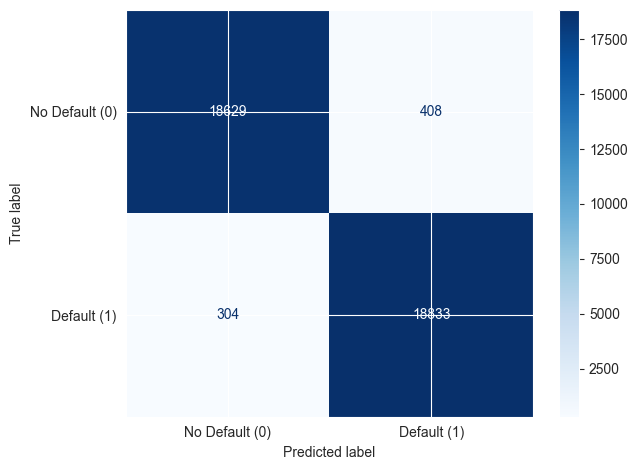

Decision Tree model saved.

Training Random Forest...
Random Forest AUC: 0.9994
Random Forest F1 Score: 0.9932
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19037
           1       1.00      0.99      0.99     19137

    accuracy                           0.99     38174
   macro avg       0.99      0.99      0.99     38174
weighted avg       0.99      0.99      0.99     38174

--------------------------------------------------
Confusion Matrix for Random Forest:
[[19036     1]
 [  256 18881]]
--------------------------------------------------


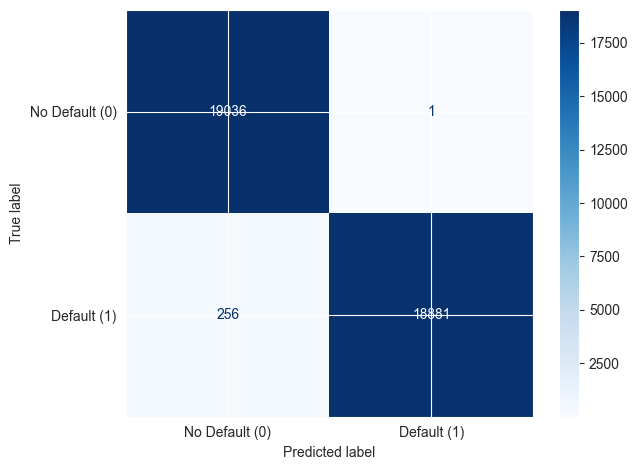

Random Forest model saved.

Training XGBoost...


C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\xgboost\core.py:158: UserWarning: [23:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost AUC: 0.9978
XGBoost F1 Score: 0.9924
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19037
           1       1.00      0.99      0.99     19137

    accuracy                           0.99     38174
   macro avg       0.99      0.99      0.99     38174
weighted avg       0.99      0.99      0.99     38174

--------------------------------------------------
Confusion Matrix for XGBoost:
[[19029     8]
 [  282 18855]]
--------------------------------------------------


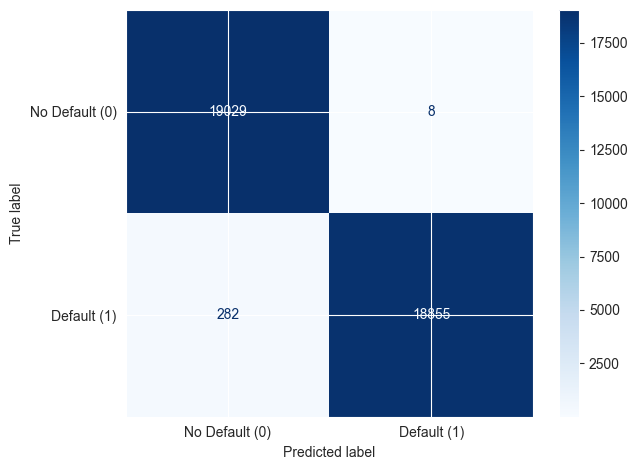

XGBoost model saved.

Training LightGBM...
[LightGBM] [Info] Number of positive: 76297, number of negative: 76397
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.297986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271547
[LightGBM] [Info] Number of data points in the train set: 152694, number of used features: 1130
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499673 -> initscore=-0.001310
[LightGBM] [Info] Start training from score -0.001310
LightGBM AUC: 0.9976
LightGBM F1 Score: 0.9926
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19037
           1       1.00      0.99      0.99     19137

    accuracy                           0.99     38174
   macro avg       0.99      0.99      0.99     38174
weighted avg       0.99      0.99      0.99     38174

--------------------------------------------------
Confusion Matrix for LightGBM:
[[

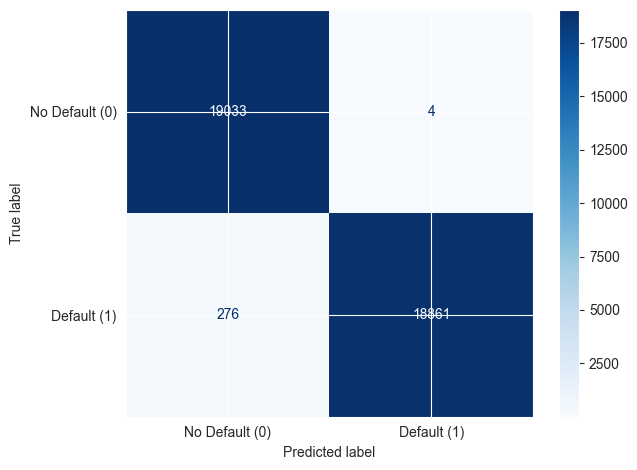

LightGBM model saved.

Training CatBoost...
CatBoost AUC: 0.9977
CatBoost F1 Score: 0.9927
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19037
           1       1.00      0.99      0.99     19137

    accuracy                           0.99     38174
   macro avg       0.99      0.99      0.99     38174
weighted avg       0.99      0.99      0.99     38174

--------------------------------------------------
Confusion Matrix for CatBoost:
[[19036     1]
 [  277 18860]]
--------------------------------------------------


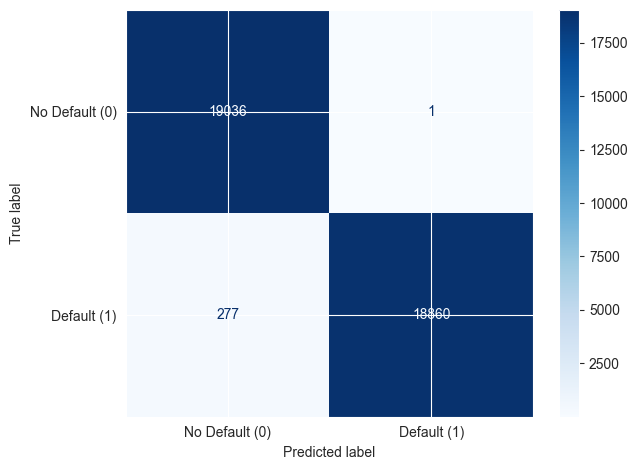

CatBoost model saved.

Training MLP...


C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLP AUC: 0.9994
MLP F1 Score: 0.9928
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19037
           1       0.99      1.00      0.99     19137

    accuracy                           0.99     38174
   macro avg       0.99      0.99      0.99     38174
weighted avg       0.99      0.99      0.99     38174

--------------------------------------------------
Confusion Matrix for MLP:
[[18787   250]
 [   27 19110]]
--------------------------------------------------


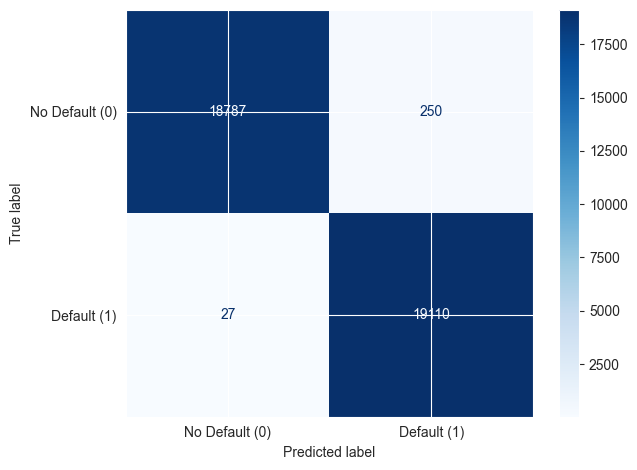

MLP model saved.



In [40]:
# import joblib
# from sklearn.metrics import f1_score
# from sklearn.metrics import ConfusionMatrixDisplay

# Train, evaluate, and save models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else y_pred
    
    # Calculate metrics
    auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {"AUC": auc, "F1 Score": f1, "Report": report}
    
    print(f"{name} AUC: {auc:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    print("-" * 50)
    
    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default (0)', 'Default (1)'])
    disp.plot(cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.show()
    
    # Save the model
    joblib.dump(model, f'{name}_model.pkl')
    print(f"{name} model saved.\n")


In [42]:
 y_pred

    

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [51]:
 y_prob=model.predict_proba(X_test_scaled)
 y_prob[0]

array([2.22044605e-16, 1.00000000e+00])

Confusion Matrix for Logistic Regression:
[[18892   145]
 [   92 19045]]
--------------------------------------------------


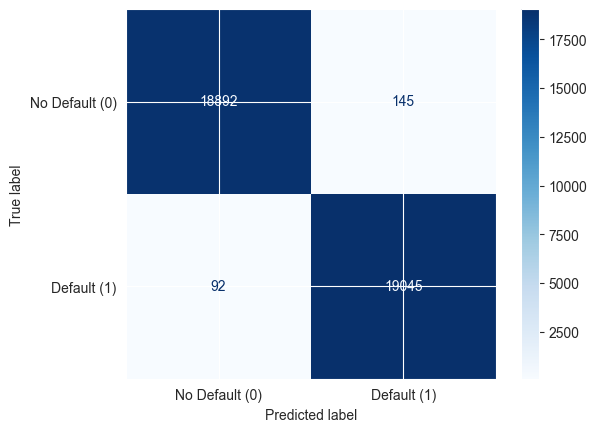

<Figure size 600x600 with 0 Axes>

Confusion Matrix for Decision Tree:
[[18892   145]
 [   92 19045]]
--------------------------------------------------


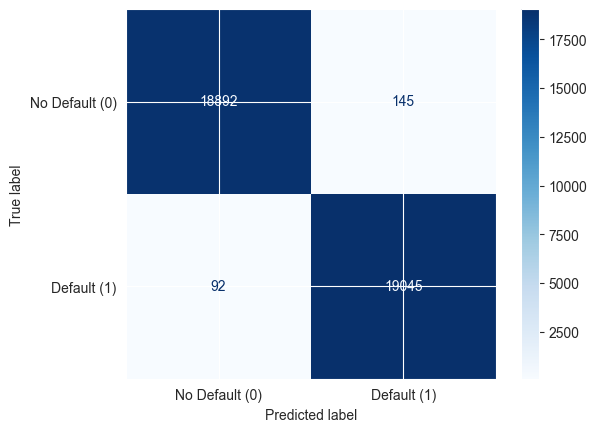

<Figure size 600x600 with 0 Axes>

Confusion Matrix for Random Forest:
[[18892   145]
 [   92 19045]]
--------------------------------------------------


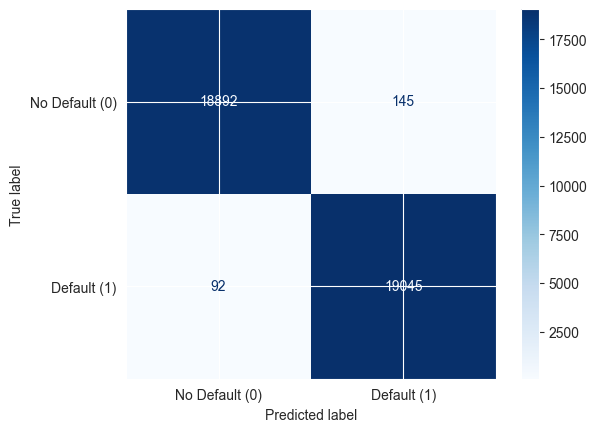

<Figure size 600x600 with 0 Axes>

Confusion Matrix for XGBoost:
[[18892   145]
 [   92 19045]]
--------------------------------------------------


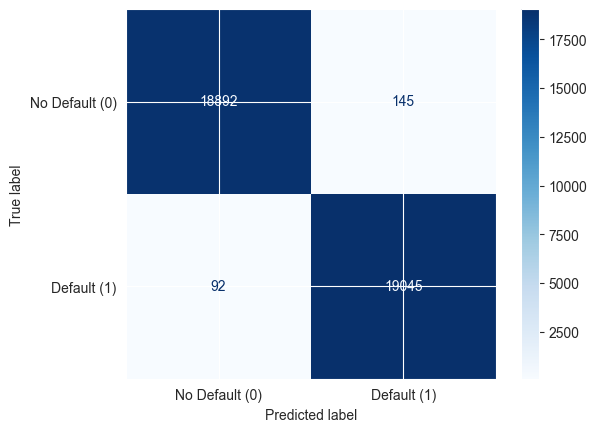

<Figure size 600x600 with 0 Axes>

Confusion Matrix for LightGBM:
[[18892   145]
 [   92 19045]]
--------------------------------------------------


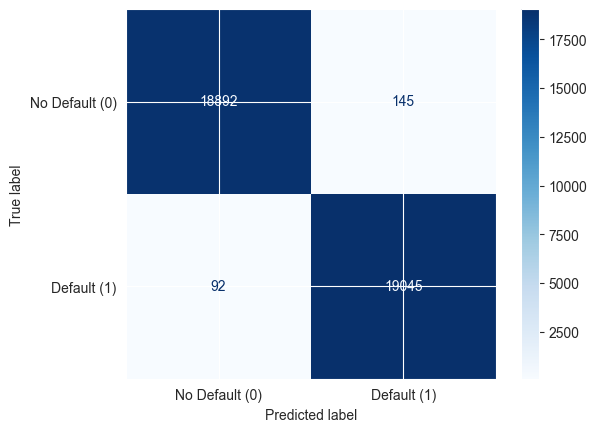

<Figure size 600x600 with 0 Axes>

Confusion Matrix for CatBoost:
[[18892   145]
 [   92 19045]]
--------------------------------------------------


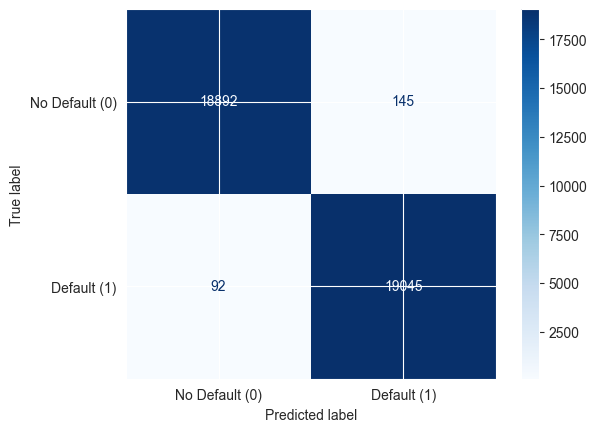

<Figure size 600x600 with 0 Axes>

Confusion Matrix for MLP:
[[18892   145]
 [   92 19045]]
--------------------------------------------------


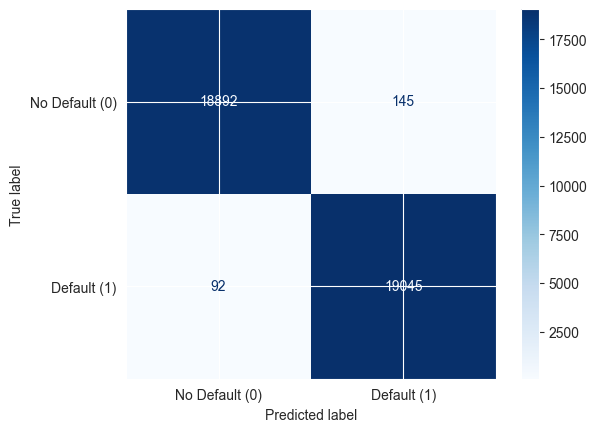

<Figure size 600x600 with 0 Axes>

In [38]:
for name, model in models.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    print("-" * 50)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default (0)', 'Default (1)'])
    disp.plot(cmap=plt.cm.Blues)
    plt.figure(figsize=(6, 6))
    # plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    # plt.title(f"Confusion Matrix - {name}")
    # plt.colorbar()
    # tick_marks = np.arange(2)
    # plt.xticks(tick_marks, ['No Default', 'Default'], rotation=45)
    # plt.yticks(tick_marks, ['No Default', 'Default'])
    # plt.ylabel('True label')
    # plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [30]:

# Compare models
print("Model Comparison:")
for name, result in results.items():
    print(f"{name}: AUC = {result['AUC']:.4f}")

Model Comparison:
Logistic Regression: AUC = 0.9741
Decision Tree: AUC = 0.9817
Random Forest: AUC = 0.9993
XGBoost: AUC = 0.9978
LightGBM: AUC = 0.9976
CatBoost: AUC = 0.9977
MLP: AUC = 0.9993


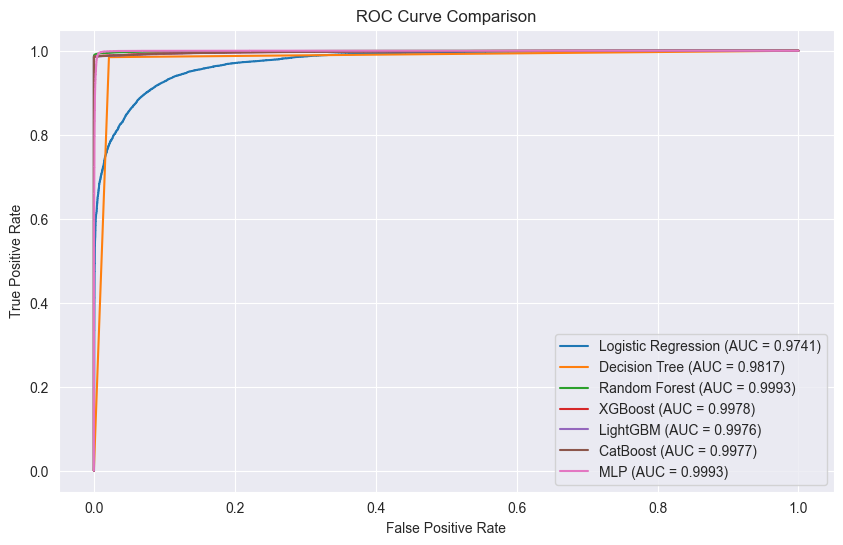

In [31]:

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else y_pred
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['AUC']:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [1]:
# Load the model
rf_model = joblib.load('MLP_model.pkl')  # Replace with your model file path


NameError: name 'joblib' is not defined

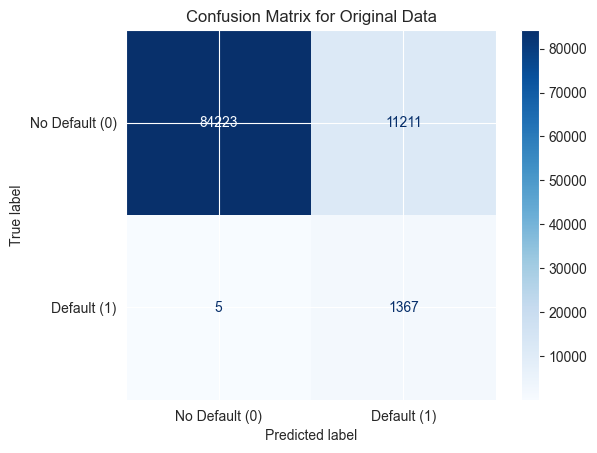

In [75]:
data = pd.read_csv("Dev_data_to_be_shared.csv")  # Replace with your file path
X_original = data.drop(columns=["bad_flag",'account_number'])  # Replace "bad_flag" with your target column name
y_original = data["bad_flag"]

from sklearn.preprocessing import StandardScaler
X_original.fillna(0, inplace=True)

# Assuming the scaler was used during training
scaler = StandardScaler()
X_original_scaled = scaler.fit_transform(X_original)

# Predict the target
y_pred_original = rf_model.predict(X_original_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_original, y_pred_original)



# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default (0)', 'Default (1)'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Original Data")
plt.show()

In [56]:
rf_model.predict(X_test_scaled)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [58]:
rf_model.predict_proba(X_test_scaled)

array([[0.  , 1.  ],
       [0.88, 0.12],
       [0.91, 0.09],
       ...,
       [0.98, 0.02],
       [0.03, 0.97],
       [0.  , 1.  ]])

In [76]:
# Predict probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Smooth probabilities to avoid exact 0 or 1
epsilon = 1e-6
y_probs_smoothed = np.clip(y_probs, epsilon, 1 - epsilon)

# Display probabilities
print("Original Probabilities:", y_probs[:5])
print("Smoothed Probabilities:", y_probs_smoothed[:5])


C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Original Probabilities: [0. 0. 0. 0. 0.]
Smoothed Probabilities: [1.e-06 1.e-06 1.e-06 1.e-06 1.e-06]


In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.combine import SMOTETomek
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


In [80]:
data = pd.read_csv("Dev_data_to_be_shared.csv")  # Replace with your file path
X = data.drop(columns=["bad_flag","account_number"])  # Features
y = data["bad_flag"]  # Target
X.fillna(0, inplace=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE-Tomek to the training data
smt = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [83]:
# Train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, random_state=42,early_stopping=True,verbose=True)
print("Training MLP...")
mlp.fit(X_train_resampled_scaled, y_train_resampled)
print(f"Number of iterations completed: {mlp.n_iter_}")

# Make predictions
y_pred = mlp.predict(X_test_scaled)
y_probs = mlp.predict_proba(X_test_scaled)[:, 1]
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_probs)
print(f"\nAUC Score: {auc_score:.4f}")


Training MLP...
Iteration 1, loss = 0.17669499
Validation score: 0.968160
Iteration 2, loss = 0.05822365
Validation score: 0.981329
Iteration 3, loss = 0.03611758
Validation score: 0.988011
Iteration 4, loss = 0.02724367
Validation score: 0.987094
Iteration 5, loss = 0.02263116
Validation score: 0.988470
Iteration 6, loss = 0.01920801
Validation score: 0.987421
Iteration 7, loss = 0.01728641
Validation score: 0.985849
Iteration 8, loss = 0.01409912
Validation score: 0.990501
Iteration 9, loss = 0.01441570
Validation score: 0.990632
Iteration 10, loss = 0.01132652
Validation score: 0.990566
Iteration 11, loss = 0.01184150
Validation score: 0.987290
Iteration 12, loss = 0.01204931
Validation score: 0.992269
Iteration 13, loss = 0.00821127
Validation score: 0.990828
Iteration 14, loss = 0.01171258
Validation score: 0.991287
Iteration 15, loss = 0.00752820
Validation score: 0.993776
Iteration 16, loss = 0.00574028
Validation score: 0.992728
Iteration 17, loss = 0.01206553
Validation score:

C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Number of iterations completed: 23

Confusion Matrix:
[[18979   113]
 [  265     5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19092
           1       0.04      0.02      0.03       270

    accuracy                           0.98     19362
   macro avg       0.51      0.51      0.51     19362
weighted avg       0.97      0.98      0.98     19362


AUC Score: 0.6473


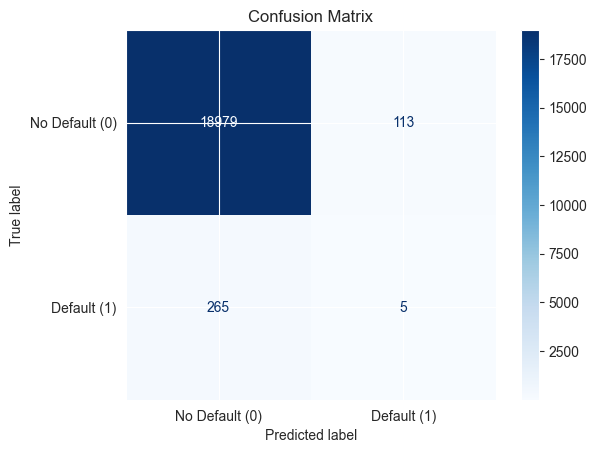

In [84]:
# Plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default (0)', 'Default (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [92]:
# Count the occurrences of each class (0 and 1) in the target variable y_test
class_counts_test = y_train_resampled.value_counts()

print(f"Count of zeros (No Default) in y_test: {class_counts_test[0]}")
print(f"Count of ones (Default) in y_test: {class_counts_test[1]}")


Count of zeros (No Default) in y_test: 76317
Count of ones (Default) in y_test: 76317


In [118]:
joblib.dump(mlp_o, f'mlpo_model.pkl')
print(f"mlp_o 2 model saved.\n")

mlp_o 2 model saved.



In [106]:
data = pd.read_csv("Dev_data_to_be_shared.csv")  # Replace with your file path
X = data.drop(columns=["bad_flag","account_number"])  # Features
y = data["bad_flag"]  # Target
X.fillna(0, inplace=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Standardize the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [107]:
# Check the first few rows of X and y
print(X.head())
print(y.head())

# Check the shapes before and after splitting
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Check the split sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


   onus_attribute_1  transaction_attribute_1  transaction_attribute_2  \
0               0.0                      0.0                      0.0   
1          221000.0                      0.0                      0.0   
2           25000.0                      0.0                      0.0   
3           86000.0                      0.0                      0.0   
4          215000.0                      0.0                      0.0   

   transaction_attribute_3  transaction_attribute_4  transaction_attribute_5  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   transaction_attribute_6  transaction_attribute_7  transaction_attribute_8  \


In [109]:
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
y_train.shape

(77444,)

In [111]:
X_train_resampled_scaled.shape

(77444, 1214)

In [115]:
# Train the MLP model
mlp_o = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, random_state=42,early_stopping=True,verbose=True)
print("Training MLP...")
mlp_o.fit(X_train_resampled_scaled, y_train)
print(f"Number of iterations completed: {mlp.n_iter_}")

# Make predictions
y_pred = mlp_o.predict(X_test_scaled)
# y_probs = mlp_o.predict_proba(X_original_scaled)[:, 1]


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# auc_score = roc_auc_score(y_test, y_probs)
# print(f"\nAUC Score: {auc_score:.4f}")


Training MLP...
Iteration 1, loss = 0.07585549
Validation score: 0.985797
Iteration 2, loss = 0.06083523
Validation score: 0.985281
Iteration 3, loss = 0.05575435
Validation score: 0.985668
Iteration 4, loss = 0.05063876
Validation score: 0.985281
Iteration 5, loss = 0.04554499
Validation score: 0.984764
Iteration 6, loss = 0.04090815
Validation score: 0.984248
Iteration 7, loss = 0.03544462
Validation score: 0.984248
Iteration 8, loss = 0.03160810
Validation score: 0.982828
Iteration 9, loss = 0.02620546
Validation score: 0.982957
Iteration 10, loss = 0.02321849
Validation score: 0.983602
Iteration 11, loss = 0.02017245
Validation score: 0.983990
Iteration 12, loss = 0.01796374
Validation score: 0.983861
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Number of iterations completed: 1

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19092
           1       0.00  

C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
y_pred = mlp_o.predict(X_)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_original, y_pred))

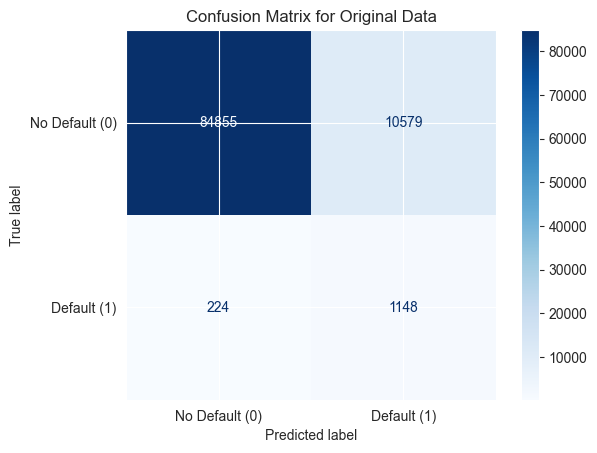

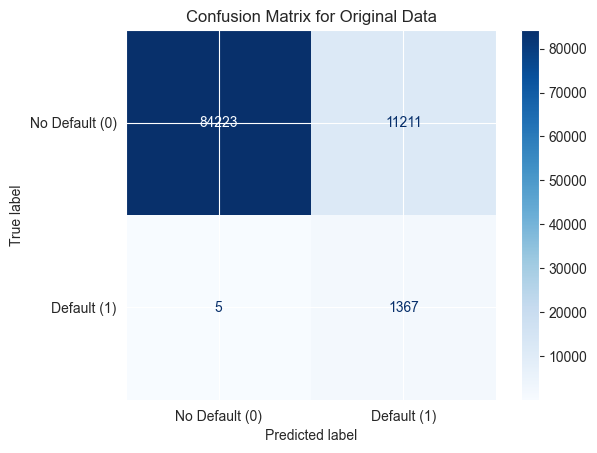

In [95]:
y_pred_original = mlp.predict(X_original_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_original, y_pred_original)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default (0)', 'Default (1)'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Original Data")
plt.show()

data = pd.read_csv("Dev_data_to_be_shared.csv")  # Replace with your file path
X_original = data.drop(columns=["bad_flag",'account_number'])  # Replace "bad_flag" with your target column name
y_original = data["bad_flag"]

from sklearn.preprocessing import StandardScaler
X_original.fillna(0, inplace=True)

# Assuming the scaler was used during training
scaler = StandardScaler()
X_original_scaled = scaler.fit_transform(X_original)

# Predict the target
y_pred_original = rf_model.predict(X_original_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_original, y_pred_original)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default (0)', 'Default (1)'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Original Data")
plt.show()

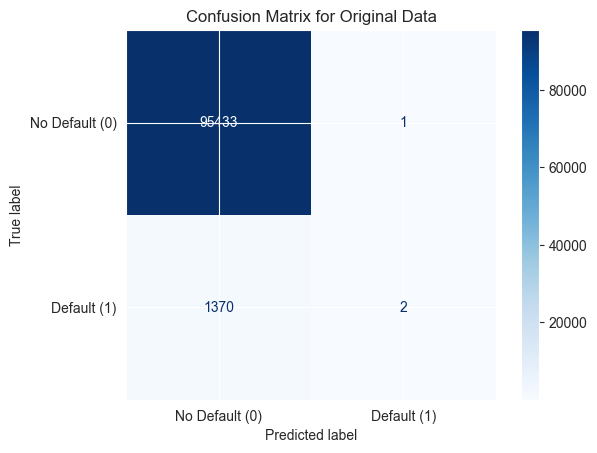

In [117]:
data = pd.read_csv("Dev_data_to_be_shared.csv")  # Replace with your file path
X_original = data.drop(columns=["bad_flag",'account_number'])  # Replace "bad_flag" with your target column name
y_original = data["bad_flag"]

from sklearn.preprocessing import StandardScaler
X_original.fillna(0, inplace=True)

# Assuming the scaler was used during training
scaler = StandardScaler()
X_original_scaled = scaler.fit_transform(X_original)

# Predict the target
y_pred_original = mlp_o.predict(X_original_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_original, y_pred_original)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default (0)', 'Default (1)'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Original Data")
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual file path
data = pd.read_csv("Dev_data_to_be_shared.csv")

# Step 2: Separate features (X) and target variable (y)
# Replace 'bad_flag' with the name of your target column
X = data.drop(columns=["bad_flag","account_number"])  # Features
y = data["bad_flag"] 
X.fillna(0, inplace=True)# Target variable

# Step 3: Train-Test Split
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE-Tomek to balance the classes in the training set
# smt = SMOTETomek(random_state=42)
# X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# Step 5: Scale the features
scaler = StandardScaler()
X_train_original = scaler.fit_transform(X_train)  # Scale the resampled training data
X_test_original = scaler.transform(X_test)
X_original = scaler.transform(X)# Scale the test data

# Print data shapes for verification
print(f"Original Training Set Shape (X_train): {X_train.shape}, (y_train): {y_train.shape}")
# print(f"Resampled Training Set Shape (X_train_resampled): {X_train_resampled.shape}, (y_train_resampled): {y_train.shape}")
print(f"Test Set Shape (X_test): {X_test.shape}, (y_test): {y_test.shape}")



Original Training Set Shape (X_train): (77444, 1214), (y_train): (77444,)
Test Set Shape (X_test): (19362, 1214), (y_test): (19362,)


In [19]:
X.shape

(96806, 1214)

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import f1_score

In [57]:
model = joblib.load('MLP_model.pkl')

In [58]:
y_pred = model.predict(X_test_original)
y_prob = model.predict_proba(X_test_original)[:, 1] if hasattr(model, "predict_proba") else y_pred
    
    # Calculate metrics
auc = roc_auc_score(y_test, y_prob)
report = classification_report(y_test, y_pred, output_dict=True)
# results[name] = {"AUC": auc, "Report": report}
    
# print(f"{name} AUC: {auc:.4f}")
print(classification_report(y_test, y_pred))
print("-" * 50)

# Compare models
# print("Model Comparison:")
# for name, result in results.items():
#     print(f"{name}: AUC = {result['AUC']:.4f}")
# 
# # Plot ROC curves
# plt.figure(figsize=(10, 6))
# for name, model in models.items():
#     y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else y_pred
#     fpr, tpr, _ = roc_curve(y_test, y_prob)
#     plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['AUC']:.4f})")


              precision    recall  f1-score   support

           0       1.00      0.88      0.94     19092
           1       0.11      1.00      0.19       270

    accuracy                           0.88     19362
   macro avg       0.55      0.94      0.56     19362
weighted avg       0.99      0.88      0.93     19362

--------------------------------------------------


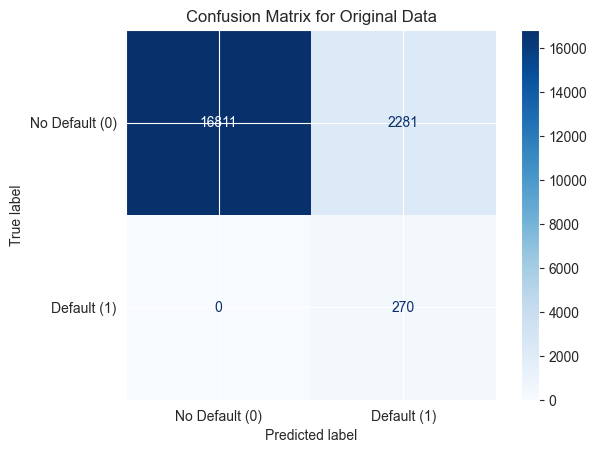

[[16811  2281]
 [    0   270]]


In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default (0)', 'Default (1)'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Original Data")
plt.show()
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve Comparison")
# plt.legend()
plt.show()
print(cm)

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

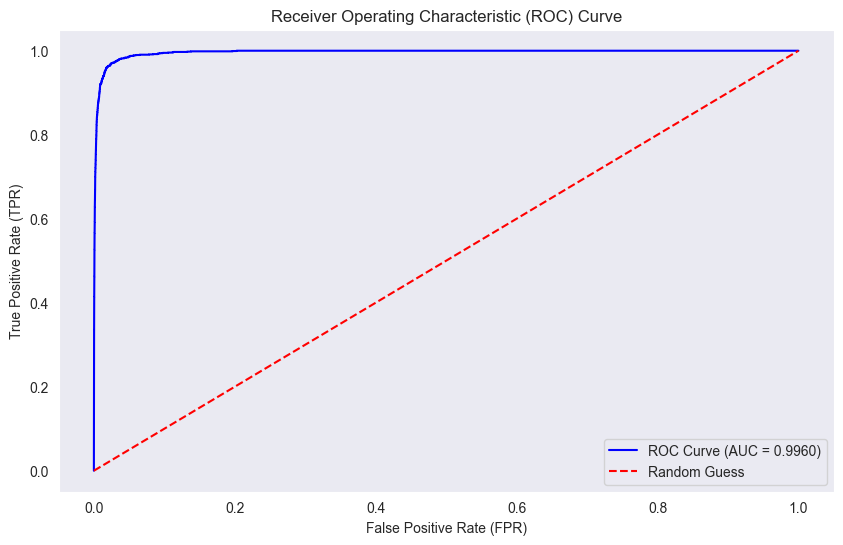

ROC AUC Score: 0.9960
[0.00000000e+00 4.19137833e-05 4.19137833e-05 4.19137833e-05
 4.19137833e-05 4.19137833e-05 4.19137833e-05 4.19137833e-05
 4.19137833e-05 5.23922292e-05 5.23922292e-05 5.23922292e-05
 6.28706750e-05 8.38275667e-05 8.38275667e-05 8.38275667e-05
 8.38275667e-05 8.38275667e-05 8.38275667e-05 8.38275667e-05
 9.43060125e-05 9.43060125e-05 9.43060125e-05 9.43060125e-05
 9.43060125e-05 9.43060125e-05 1.15262904e-04 1.15262904e-04
 1.25741350e-04 1.25741350e-04 1.36219796e-04 1.36219796e-04
 1.46698242e-04 1.46698242e-04 1.57176688e-04 1.57176688e-04
 1.67655133e-04 1.67655133e-04 1.78133579e-04 1.78133579e-04
 1.88612025e-04 1.88612025e-04 1.99090471e-04 1.99090471e-04
 2.09568917e-04 2.09568917e-04 2.30525808e-04 2.30525808e-04
 2.41004254e-04 2.41004254e-04 2.51482700e-04 2.51482700e-04
 2.61961146e-04 2.61961146e-04 2.72439592e-04 2.72439592e-04
 2.82918038e-04 2.82918038e-04 2.93396483e-04 2.93396483e-04
 3.03874929e-04 3.03874929e-04 3.14353375e-04 3.14353375e-04
 3

In [27]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = roc_auc_score(y, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()
print(f"ROC AUC Score: {roc_auc:.4f}")
print(fpr, tpr, thresholds)

In [38]:
y_prob=model.predict_proba(X_original)


In [36]:
import numpy as np

# Evaluate model performance at different thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
for thresh in thresholds:
    predicted_labels = (y_prob >= thresh).astype(int)
    print(f"Threshold: {thresh:.1f}")
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))
    print("-" * 50)


Threshold: 0.1
[[84026 11408]
 [    4  1368]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     95434
           1       0.11      1.00      0.19      1372

    accuracy                           0.88     96806
   macro avg       0.55      0.94      0.56     96806
weighted avg       0.99      0.88      0.93     96806

--------------------------------------------------
Threshold: 0.2
[[84026 11408]
 [    4  1368]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     95434
           1       0.11      1.00      0.19      1372

    accuracy                           0.88     96806
   macro avg       0.55      0.94      0.56     96806
weighted avg       0.99      0.88      0.93     96806

--------------------------------------------------
Threshold: 0.3
[[84026 11408]
 [    4  1368]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     954

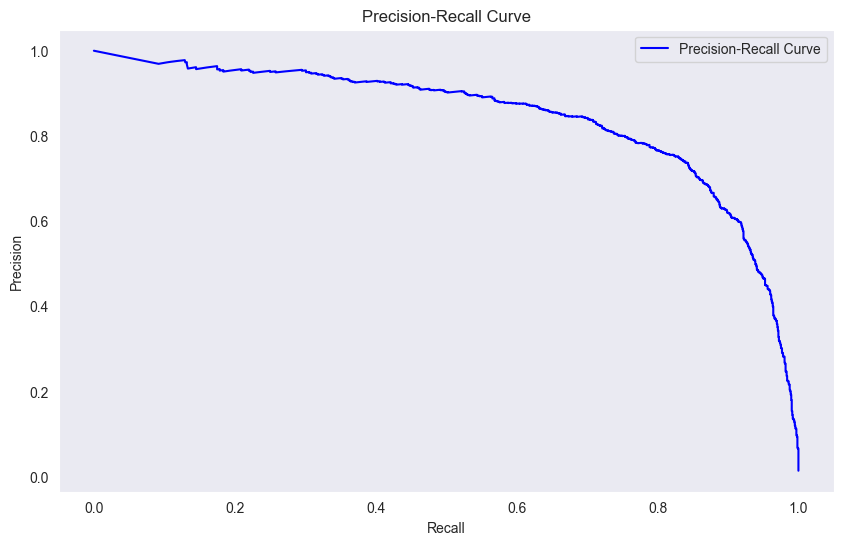

In [37]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [50]:
threshold = 0.1
predicted_labels = (y_prob >= threshold).astype(int)

In [51]:
predicted_labels

array([[1, 0],
       [1, 0],
       [1, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

Applying SMOTE...
Iteration 1, loss = 0.16894340
Validation score: 0.979763
Iteration 2, loss = 0.04049740
Validation score: 0.985592
Iteration 3, loss = 0.02288220
Validation score: 0.989259
Iteration 4, loss = 0.02081227
Validation score: 0.989259
Iteration 5, loss = 0.01599498
Validation score: 0.991159
Number of iterations completed: 5


C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Model saved as mlp_model_smote.joblib


<Figure size 600x600 with 0 Axes>

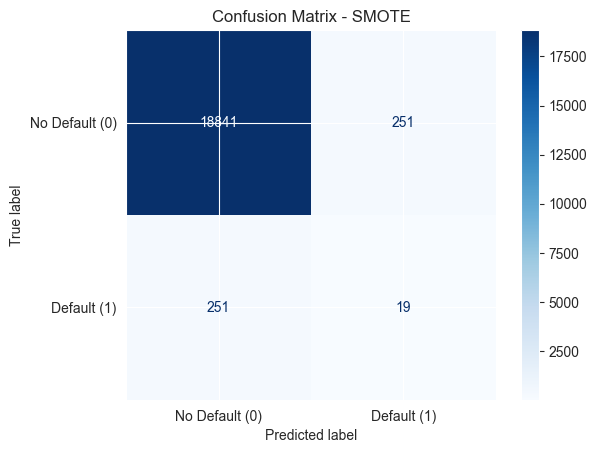

Applying ADASYN...
Iteration 1, loss = 0.17132705
Validation score: 0.981812
Iteration 2, loss = 0.04149652
Validation score: 0.991168
Iteration 3, loss = 0.02363146
Validation score: 0.988616
Iteration 4, loss = 0.01733376
Validation score: 0.994832
Iteration 5, loss = 0.01701739
Validation score: 0.991626


C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of iterations completed: 5
Model saved as mlp_model_adasyn.joblib


<Figure size 600x600 with 0 Axes>

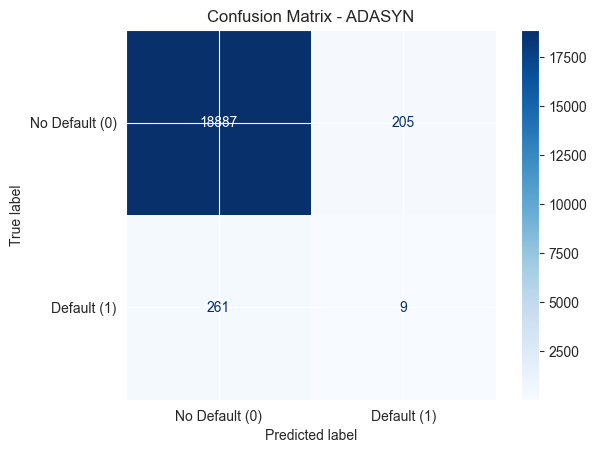

Applying Borderline-SMOTE...
Iteration 1, loss = 0.10491209
Validation score: 0.986443
Iteration 2, loss = 0.03781418
Validation score: 0.988735
Iteration 3, loss = 0.02587778
Validation score: 0.989456
Iteration 4, loss = 0.02155469
Validation score: 0.991944
Iteration 5, loss = 0.01447685
Validation score: 0.992599


C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of iterations completed: 5
Model saved as mlp_model_borderline-smote.joblib


<Figure size 600x600 with 0 Axes>

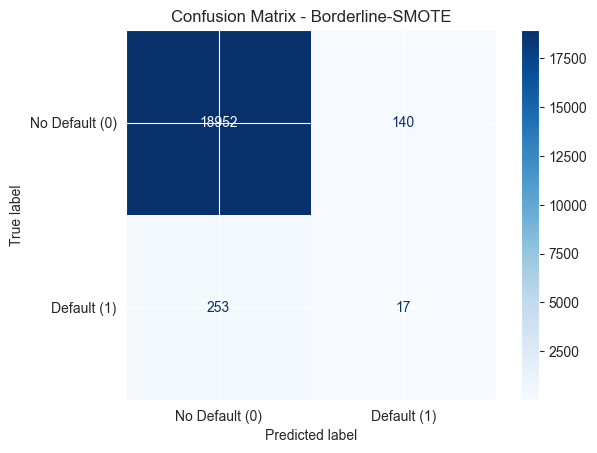

Applying Random Oversampling...
Iteration 1, loss = 0.17309973
Validation score: 0.985395
Iteration 2, loss = 0.03565223
Validation score: 0.983627
Iteration 3, loss = 0.02035398
Validation score: 0.994237
Iteration 4, loss = 0.02697076
Validation score: 0.993844
Iteration 5, loss = 0.01289106
Validation score: 0.992272


C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of iterations completed: 5
Model saved as mlp_model_random_oversampling.joblib


<Figure size 600x600 with 0 Axes>

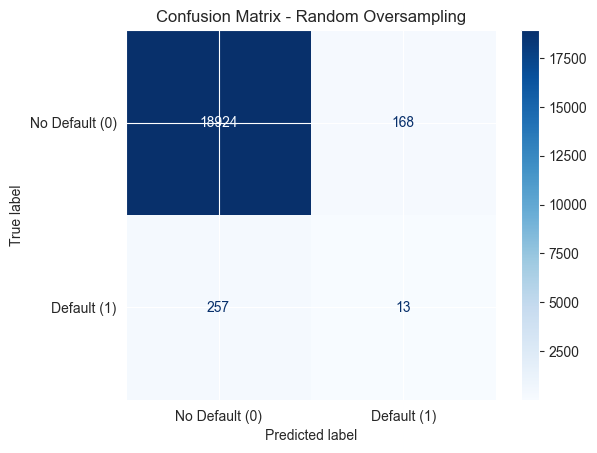

Applying Tomek Links...
Iteration 1, loss = 0.07998920
Validation score: 0.985770
Iteration 2, loss = 0.06275199
Validation score: 0.985640


C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Number of iterations completed: 2
Model saved as mlp_model_tomek_links.joblib


<Figure size 600x600 with 0 Axes>

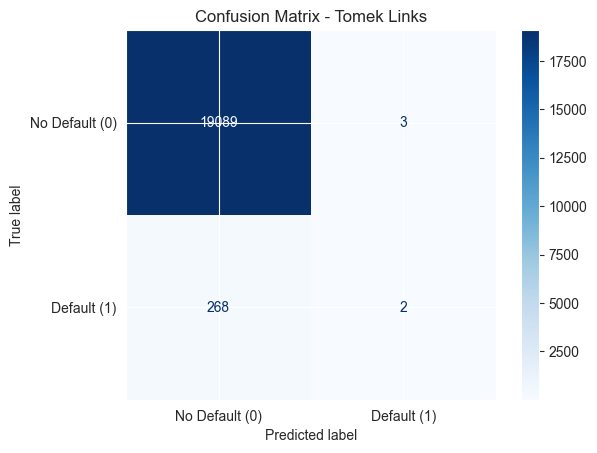

Applying Edited Nearest Neighbours...



KeyboardInterrupt



In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours
import matplotlib.pyplot as plt
import joblib  # For saving models

# Load dataset
# file_path = 'your_dataset.csv'  # Replace with your dataset path
# df = pd.read_csv(file_path)
# 
# # Separate features and target
# X = df.drop(columns=['bad_flag', 'account_number'])  # Drop non-feature columns
# y = df['bad_flag']
# 
# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resampling methods
resampling_methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Borderline-SMOTE": BorderlineSMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Tomek Links": TomekLinks(),
    "Edited Nearest Neighbours": EditedNearestNeighbours()
}

# Train anraad evaluate models
for method_name, sampler in resampling_methods.items():
    print(f"Applying {method_name}...")

    # Apply resampling
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
    except Exception as e:
        print(f"Skipping {method_name} due to error: {e}")
        continue

    # Train MLPClassifier
    model = MLPClassifier(hidden_layer_sizes=(512,256), max_iter=5, random_state=42,early_stopping=True,verbose=True)
    
    model.fit(X_resampled, y_resampled)
    print(f"Number of iterations completed: {model.n_iter_}")

    # Save the model
    model_filename = f"mlp_model_{method_name.replace(' ', '_').lower()}.joblib"
    joblib.dump(model, model_filename)
    print(f"Model saved as {model_filename}")

    # Predict on test set
    y_pred = model.predict(X_test_scaled)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default (0)', 'Default (1)'])

    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix - {method_name}")
    plt.show()


In [60]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours
import matplotlib.pyplot as plt

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
# file_path = 'your_dataset.csv'  # Replace with your dataset path
# df = pd.read_csv(file_path)
# 
# # Separate features and target
# X = df.drop(columns=['bad_flag', 'account_number'])  # Drop non-feature columns
# y = df['bad_flag']
# 
# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using device: cuda


In [61]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resampling methods
resampling_methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Borderline-SMOTE": BorderlineSMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Tomek Links": TomekLinks(),
    "Edited Nearest Neighbours": EditedNearestNeighbours()
}

In [64]:

# Define a PyTorch MLP model
class MLPModel(nn.Module):
    def __init__(self, input_dim):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)  # First hidden layer (512 neurons)
        self.fc2 = nn.Linear(512, 256)       # Second hidden layer (256 neurons)
        self.output = nn.Linear(256, 1)     # Output layer (1 neuron for binary classification)
        self.relu = nn.ReLU()               # Activation function
        self.sigmoid = nn.Sigmoid()         # Sigmoid for binary classification output

    def forward(self, x):
        x = self.relu(self.fc1(x))          
        # Input -> Hidden Layer 1 -> ReLU
        x = self.relu(self.fc2(x))          # Hidden Layer 1 -> Hidden Layer 2 -> ReLU
        x = self.sigmoid(self.output(x))    # Hidden Layer 2 -> Output Layer -> Sigmoid
        return x

Applying SMOTE...
Epoch [1/10], Loss: 101.4116
Epoch [2/10], Loss: 119283.0629
Epoch [3/10], Loss: 762.9412
Epoch [4/10], Loss: 1076.9893
Epoch [5/10], Loss: 1074.0391
Epoch [6/10], Loss: 1344.1214
Epoch [7/10], Loss: 886.8999
Epoch [8/10], Loss: 1778.8785
Epoch [9/10], Loss: 1897.5478
Epoch [10/10], Loss: 1895.9085
Model saved as mlp_model_smote.pt


<Figure size 600x600 with 0 Axes>

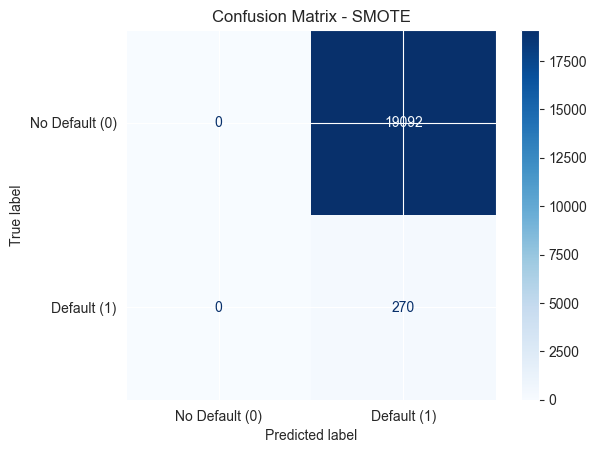

Applying ADASYN...
Epoch [1/10], Loss: 104.0962
Epoch [2/10], Loss: 600.9413
Epoch [3/10], Loss: 965.9268
Epoch [4/10], Loss: 824.5961
Epoch [5/10], Loss: 1113.0596
Epoch [6/10], Loss: 1392.7012
Epoch [7/10], Loss: 664.0171
Epoch [8/10], Loss: 964.5110
Epoch [9/10], Loss: 1328.6146
Epoch [10/10], Loss: 1823.8200
Model saved as mlp_model_adasyn.pt


<Figure size 600x600 with 0 Axes>

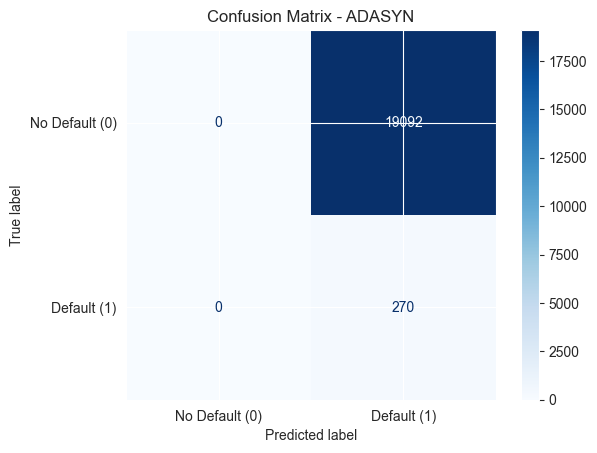

Applying Borderline-SMOTE...
Epoch [1/10], Loss: 100.0700
Epoch [2/10], Loss: 1795.3795
Epoch [3/10], Loss: 911.6845
Epoch [4/10], Loss: 689.2562
Epoch [5/10], Loss: 837.0696
Epoch [6/10], Loss: 344.6686
Epoch [7/10], Loss: 1014.2253
Epoch [8/10], Loss: 675.7992
Epoch [9/10], Loss: 755.1785
Epoch [10/10], Loss: 470.2299
Model saved as mlp_model_borderline-smote.pt


<Figure size 600x600 with 0 Axes>

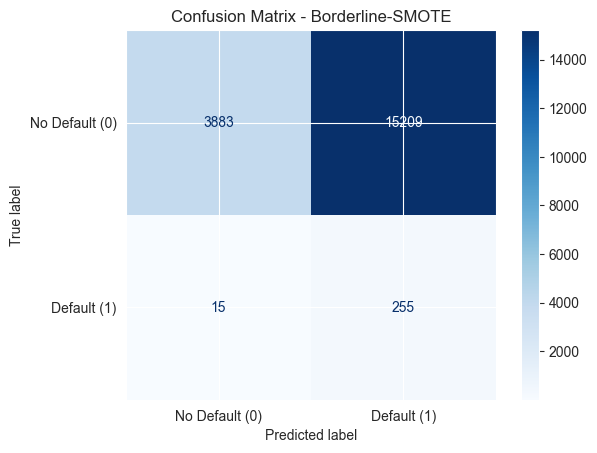

Applying Random Oversampling...
Epoch [1/10], Loss: 102.0025


KeyboardInterrupt: 

In [65]:

# Train and evaluate models
for method_name, sampler in resampling_methods.items():
    print(f"Applying {method_name}...")

    # Apply resampling
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
    except Exception as e:
        print(f"Skipping {method_name} due to error: {e}")
        continue

    # Convert data to PyTorch tensors
    X_resampled = torch.tensor(X_resampled, dtype=torch.float32).to(device)
    y_resampled = torch.tensor(y_resampled.values, dtype=torch.float32).unsqueeze(1).to(device)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1).to(device)

    # Initialize the model, loss function, and optimizer
    model = MLPModel(input_dim=X_resampled.shape[1]).to(device)
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    epochs = 10
    batch_size = 64
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for i in range(0, len(X_resampled), batch_size):
            X_batch = X_resampled[i:i+batch_size]
            y_batch = y_resampled[i:i+batch_size]

            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

    # Save the model
    model_filename = f"mlp_model_{method_name.replace(' ', '_').lower()}.pt"
    torch.save(model.state_dict(), model_filename)
    print(f"Model saved as {model_filename}")

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        y_pred_labels = (y_pred.cpu().numpy() > 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default (0)', 'Default (1)'])

    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix - {method_name}")
    plt.show()


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv("validation_data_to_be_shared.csv")

# Step 2: Separate features (X) and target variable (y)
X = data.drop(columns=[ "account_number"])  # Features
y = data["account_number"]  # Target variable
X.fillna(0, inplace=True)  # Handle missing values by filling with 0

# Step 3: Load the trained model
model_path = "MLP_model.pkl"  # Path to the saved model
mlp_model = joblib.load(model_path)
print(f"Loaded model from '{model_path}'")

# Step 4: Scale the entire dataset using the same scaler that was used during training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset

# Step 5: Make predictions on the entire dataset
y_pred = mlp_model.predict(X_scaled)
y_probs=mlp_model.predict_proba(X_scaled)

# Step 6: Compute the F1 Score
# f1 = f1_score(y, y_pred, average="weighted")
# print(f"F1 Score (Weighted): {f1:.4f}")

# Step 7: Print the classification report
# print("Classification Report:")
# print(classification_report(y, y_pred))

# Step 8: Plot and display the confusion matrix
# cm = confusion_matrix(y, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()

# Optional: Save the predictions to a CSV file
predictions = pd.DataFrame({"": y, "Predicted": y_pred,"predicted probability ":y_probs[:,1]})
predictions.to_csv("model_predictions2.csv", index=False)
print("Predictions saved to 'final_predictions.csv'")


Loaded model from 'MLP_model.pkl'
Predictions saved to 'final_predictions.csv'


In [11]:
y_probs[:,1]

array([9.54790203e-05, 7.28652749e-02, 6.19425836e-21, ...,
       6.60973262e-04, 2.08721050e-02, 9.99646378e-01])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv("validation_data_to_be_shared.csv")

# Step 2: Separate features (X) and target variable (y)
X = data.drop(columns=["account_number"])  # Features
account_numbers = data["account_number"]  # Save account numbers
X.fillna(0, inplace=True)  # Handle missing values by filling with 0

# Step 3: Load the trained model
model_path = "MLP_model.pkl"  # Path to the saved model
mlp_model = joblib.load(model_path)
print(f"Loaded model from '{model_path}'")

# Step 4: Scale the dataset using the same scaler that was used during training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset

# Step 5: Make predictions on the entire dataset
y_pred = mlp_model.predict(X_scaled)
y_probs = mlp_model.predict_proba(X_scaled)[:, 1]  # Get probabilities for class 1 (default)

# Step 6: Adjust probabilities to have a minimum value of 0.1
y_probs_adjusted = np.where(y_probs < 0.01, 0.01, y_probs)

# Step 7: Save the predictions to a CSV file
predictions = pd.DataFrame({
    "account_number": account_numbers, 
    # "Predicted_Class": y_pred, 
    "Predicted_Probability": y_probs_adjusted
})
predictions.to_csv("final_predictions.csv", index=False)
print("Predictions saved to 'final_predictions.csv'")


GITHUB TO COMPLETE CODE :

https://github.com/Userfrom1995/CreditCard_Predictions